In [13]:
#loading the Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Data 
salary = pd.read_csv('Salaries.csv')
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About the column

1 Rank:- It defines the person's designation and has 3 category.

2 Descipline:- it is categorized into two entity.

3 yrs.since.phd :- this column depicts years before the PHD completed.

4 yrs.service:- it defines the number of years a person is working.

5 sex:- it shows the gender of a person.

6 salary:- this column shows the amount is been paid to the person

In [4]:
#finding out the null values in dataframe
salary.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

   _ As per the above code there is no null value in any column

In [5]:
salary.shape

(397, 6)

In [6]:
salary['rank'].unique()



array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

As per the above code we find out there are 3 fields of ranks but they string so we will use lable encoder to  convert these value into numeric form.

In [7]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
salary['rank']= le.fit_transform(salary['rank'])
salary.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500
5,0,B,6,6,Male,97000
6,2,B,30,23,Male,175000
7,2,B,45,45,Male,147765
8,2,B,21,20,Male,119250
9,2,B,18,18,Female,129000


After using the label Encoder the ranks are been coded in followings [2='Prof', 1='AsstProf', 0='AssocProf']

# EDA

<AxesSubplot:xlabel='salary', ylabel='yrs.service'>

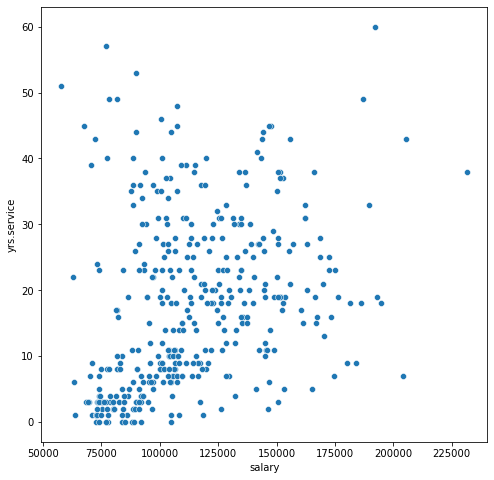

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='salary', y='yrs.service', data=salary)

<AxesSubplot:xlabel='sex', ylabel='salary'>

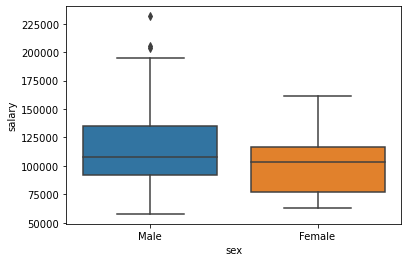

In [21]:
sns.boxplot(x='sex' , y='salary',  data=salary)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

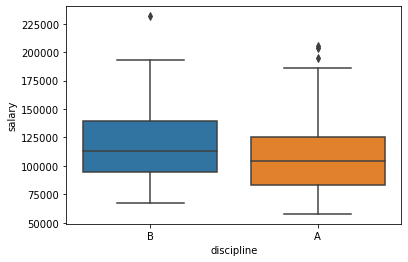

In [28]:
sns.boxplot(y='salary', x='discipline', data=salary)

<AxesSubplot:xlabel='discipline', ylabel='count'>

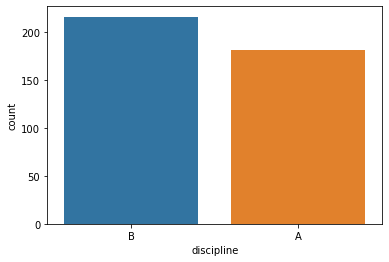

In [31]:
sns.countplot(x='discipline', data=salary)

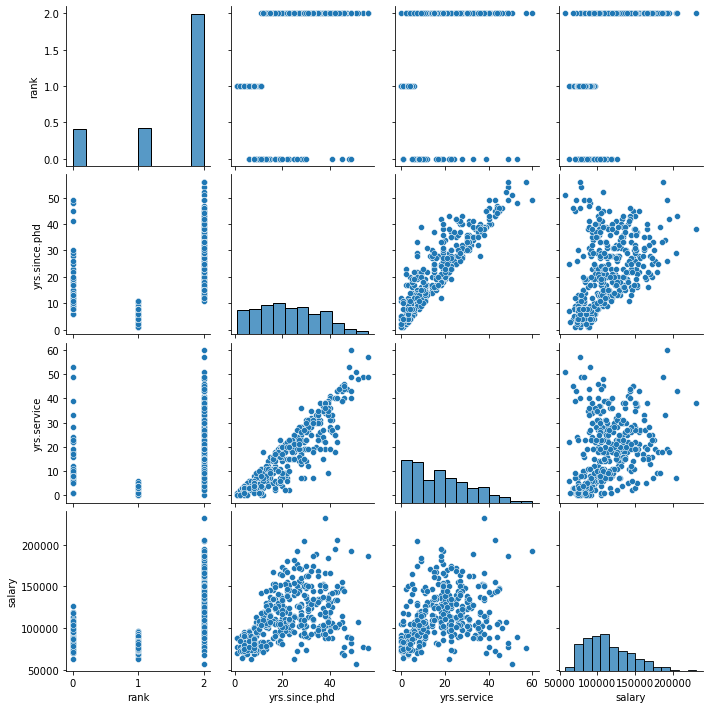

In [15]:
sns.pairplot(data=salary)

As per the observation:

~ Most number of high salaried people are Profesors. 

~ The  majority of salary range is between 100000-150000

~ Rank plays important role for the salary. As the rank increses,salary increses.


In [23]:
salary.describe()

,rank,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,1.508816,22.314861,17.614610,113706.458438
std,0.757486,12.887003,13.006024,30289.038695
min,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,12.000000,7.000000,91000.000000
50%,2.000000,21.000000,16.000000,107300.000000
75%,2.000000,32.000000,27.000000,134185.000000
max,2.000000,56.000000,60.000000,231545.000000


As per above decriptions
there is huge difference between 75% and max in columns yrs.since.phd, yrs.service
~ Rank:

mean=1.508816

std	=0.757486

max	=2.000000

min	=0.000000

~ yrs.since.phd

mean= 22.314861

std= 17.614610	

max= 56.000000

min= 60.000000

~yrs.service

mean=17.614610

std=13.006024

max=60.000000

min=0.000000

~salary:

mean=113706.458438

std=30289.038695

max=231545.000000

min=57800.000000

# Correlation:

In [24]:
salary.corr()

,rank,yrs.since.phd,yrs.service,salary
rank,1.000000,0.525500,0.447499,0.522207
yrs.since.phd,0.525500,1.000000,0.909649,0.419231
yrs.service,0.447499,0.909649,1.000000,0.334745
salary,0.522207,0.419231,0.334745,1.000000


<AxesSubplot:>

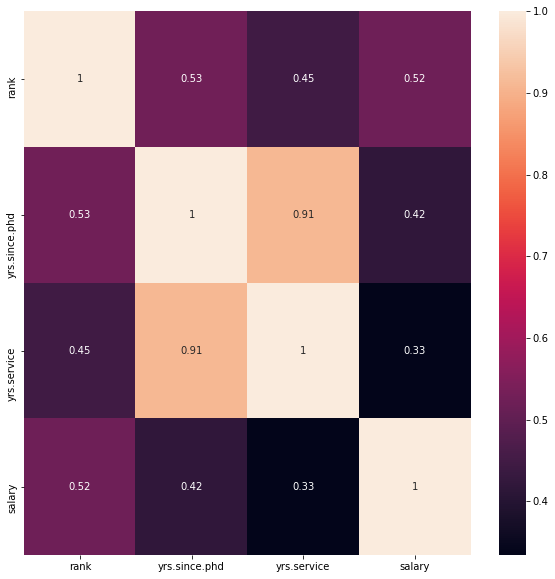

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(salary.corr(), annot=True, linecolor='black')

As per heatmap there are some observations are listed below:

~ Rank is the highest correlated 52% among all the other factors

~yrs.service is least correlated 33% to the among all the other factors

~all the columns are positively correlated with salary column

# skewness

In [56]:
salary.skew()

rank            -1.151164
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

the skewness threshold is take +/- .60 . so after analysis it is found that there is skewness in Rank , salary

# Distribution curve

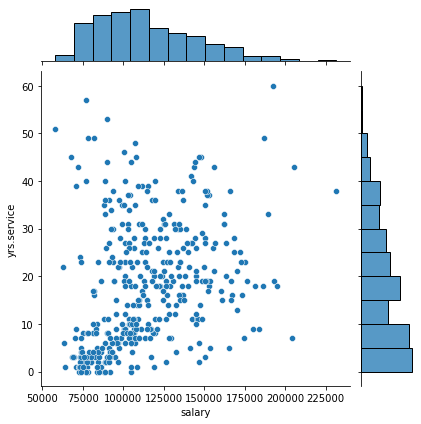

In [70]:
sns.jointplot(x=salary['salary'] ,y=salary['yrs.service'] )

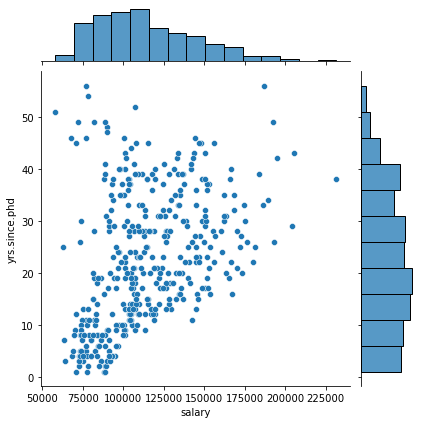

In [71]:
sns.jointplot(x=salary['salary'], y=salary['yrs.since.phd'])

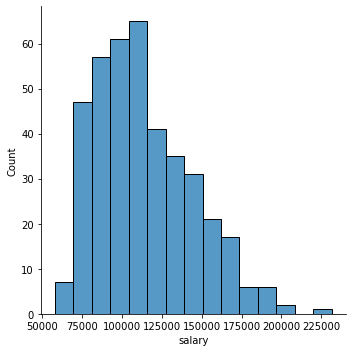

In [72]:
sns.displot(salary['salary'])

# Data cleaning 

In this Data Frame column 'sex' is not showing any kind of correlation with salary we will drop that column

In [75]:
salary= salary.drop('sex' ,axis=1)

In [76]:
salary

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,B,19,18,139750
1,2,B,20,16,173200
2,1,B,4,3,79750
3,2,B,45,39,115000
4,2,B,40,41,141500
...,...,...,...,...,...
392,2,A,33,30,103106
393,2,A,31,19,150564
394,2,A,42,25,101738
395,2,A,25,15,95329


In [79]:
salary['discipline'] = salary.replace(to_replace=['B','A'], value=[0,1])

In [80]:
salary

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,2,19,18,139750
1,2,2,20,16,173200
2,1,1,4,3,79750
3,2,2,45,39,115000
4,2,2,40,41,141500
...,...,...,...,...,...
392,2,2,33,30,103106
393,2,2,31,19,150564
394,2,2,42,25,101738
395,2,2,25,15,95329


# Removing the outliers using Zscore

In [81]:
from scipy.stats import zscore
z = np.abs(zscore(salary))
z.shape

(397, 5)

In [82]:
threshold=3
print(np.where(z>3))


(array([ 43, 131, 330, 364]), array([4, 3, 3, 4]))


In [84]:
salary_new= salary[(z<3).all(axis=1)]

In [85]:
salary_new.shape

(393, 5)

As shown in the above line we did not loss a lot data while findling the zscore

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error ,r2_score
from math import sqrt

In [104]:
x=salary_new.iloc[:,0:-1]
y= salary_new.iloc[:,-1]

In [109]:
train_x,test_x,train_y,test_y= train_test_split(x,y, test_size=.20, random_state=48)

lr = LinearRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)
pred_lr= lr.predict(test_x)
print('the mean suared error is:', mean_squared_error(test_y,pred_lr))
print('the r2 score is:',r2_score(test_y,pred_lr))

the mean suared error is: 616204057.3099649
the r2 score is: 0.264409075161656


In [97]:
lr.coef_

array([8491.55028449, 8491.55028449,  876.34234636, -496.39506931])

<AxesSubplot:ylabel='salary'>

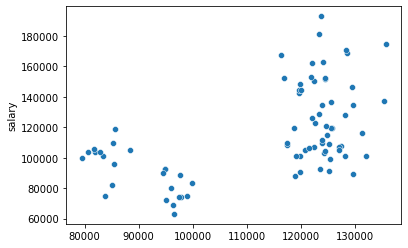

In [102]:
sns.scatterplot(x=pred_lr, y=test_y, )

# Cross validation score

In [115]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=lr,X=train_x,y=train_y,cv=5)
print('cross_val_score :', cross_val)
print('average corss_val_score is:',np.mean(cross_val))

cross_val_score : [0.4810972  0.19106399 0.20069774 0.3131871  0.2602175 ]
average corss_val_score is: 0.28925270500573325


# Trying the other models


In [124]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

dtc = DecisionTreeRegressor()
svr= SVR()
knr= KNeighborsRegressor()
rf= RandomForestRegressor()

model=[dtc,svr,knr,rf]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    pred_m = m.predict(test_x)
    print('the mean squared error of', m ,'is',mean_squared_error(test_y,pred_m))
    
    


the mean squared error of DecisionTreeRegressor() is 902798059.5766526
the mean squared error of SVR() is 909744658.7516361
the mean squared error of KNeighborsRegressor() is 522207848.6065823
the mean squared error of RandomForestRegressor() is 629522548.412043


# Evaluating the metrics

In [130]:
dtc = DecisionTreeRegressor()
svr= SVR()
knr= KNeighborsRegressor()
rf= RandomForestRegressor()
lr = LinearRegression()

model = [dtc,svr,knr,rf,lr]

for i in model:
    i.fit(train_x,train_y)
    pred_i=i.predict(test_x)
    print('the mean sqaured error of ',i, 'is', mean_squared_error(test_y,pred_i))
    print('the RMSE of', i ,'is', sqrt(mean_squared_error(test_y,pred_i)) )
    print('the r2 score of ', i,'is' ,r2_score(test_y,pred_i) )
    print('\n')

the mean sqaured error of  DecisionTreeRegressor() is 903210024.766526
the RMSE of DecisionTreeRegressor() is 30053.45279275787
the r2 score of  DecisionTreeRegressor() is -0.07820305556194573


the mean sqaured error of  SVR() is 909744658.7516361
the RMSE of SVR() is 30161.973721088547
the r2 score of  SVR() is -0.08600374658233823


the mean sqaured error of  KNeighborsRegressor() is 522207848.6065823
the RMSE of KNeighborsRegressor() is 22851.86750807431
the r2 score of  KNeighborsRegressor() is 0.3766166422349102


the mean sqaured error of  RandomForestRegressor() is 636130422.78255
the RMSE of RandomForestRegressor() is 25221.626093147723
the r2 score of  RandomForestRegressor() is 0.2406220626732385


the mean sqaured error of  LinearRegression() is 616204057.3099649
the RMSE of LinearRegression() is 24823.457803254663
the r2 score of  LinearRegression() is 0.264409075161656




After the carefull analysis of above, it is clearly evident that KNN has the Lowest RMSE(root mean sqaured error) and highest r2 score among all other models followed by Linear Regression and Random forest Regressor. it is concluded that KNeighborsRegressor will be choose for prediction.

# Saving the model

In [133]:
import pickle
file= ('salary_prediction_knn.txt')
pickle.dump(knr,open(file,'wb'))

In [134]:
# creating a dataframe of predicted and actual data
pred_knr = knr.predict(test_x)
salary=pd.DataFrame({'Actual salary':np.array(test_y),'Predicted salary':np.array(pred_knr)} )

In [135]:
salary

,Actual salary,Predicted salary
0,100000,91609.8
1,108262,124676.6
2,74000,79700.0
3,119450,106703.0
4,168635,112843.6
...,...,...
74,74830,90429.8
75,152708,137069.0
76,136500,131743.8
77,193000,134558.6


# Loading the model

In [136]:
load_model = pickle.load(open(file,'rb'))
score = load_model.score(test_x,test_y)*100
score

37.66166422349102

The model has been given the data to predict.